In [26]:
import pandas as pd


train_main = pd.read_csv("D:/Web Dev/healthcare-fraud-detection/data/raw/Train.csv")
train_inpatient = pd.read_csv("D:/Web Dev/healthcare-fraud-detection/data/raw/Train_Inpatientdata.csv")
train_outpatient = pd.read_csv("D:/Web Dev/healthcare-fraud-detection/data/raw/Train_Outpatientdata.csv")
train_beneficiaries = pd.read_csv("D:/Web Dev/healthcare-fraud-detection/data/raw/Train_Beneficiarydata.csv") 

In [3]:
print(train_main.shape, train_inpatient.shape, train_outpatient.shape, train_beneficiaries.shape)

(5410, 2) (40474, 30) (517737, 27) (138556, 25)


In [5]:
print(train_main.columns, train_inpatient.columns, train_outpatient.columns, train_beneficiaries.columns)

Index(['Provider', 'PotentialFraud'], dtype='object') Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object') Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDi

In [6]:
print(train_main.isnull().sum())

Provider          0
PotentialFraud    0
dtype: int64


In [7]:
print(train_main['PotentialFraud'].value_counts())

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64


Text(0.5, 1.0, 'Fraud vs Non-Fraud Claims')

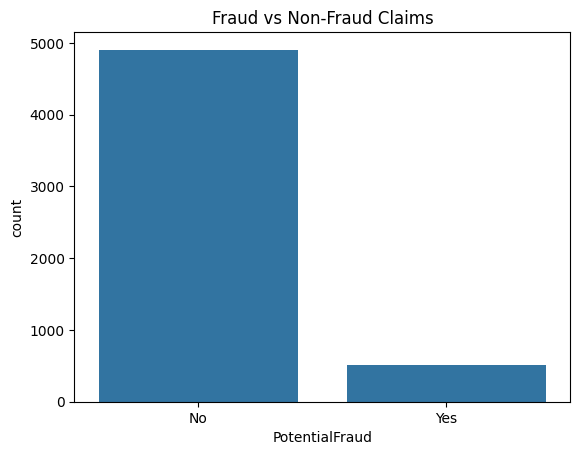

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns   

sns.countplot(data=train_main, x='PotentialFraud')
plt.title("Fraud vs Non-Fraud Claims")

In [17]:
# get the first 5 rows of each dataframe
print(train_main.head())



   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No


In [18]:
claims = pd.concat([train_inpatient, train_outpatient], ignore_index=True)

In [19]:
claims_beneficiary = claims.merge(train_beneficiaries, on="BeneID", how="left")
full_data = claims_beneficiary.merge(train_main, on="Provider", how="left")
print(full_data.shape)
print(full_data.head())

(558211, 55)
      BeneID   ClaimID ClaimStartDt  ClaimEndDt  Provider  \
0  BENE11001  CLM46614   2009-04-12  2009-04-18  PRV55912   
1  BENE11001  CLM66048   2009-08-31  2009-09-02  PRV55907   
2  BENE11001  CLM68358   2009-09-17  2009-09-20  PRV56046   
3  BENE11011  CLM38412   2009-02-14  2009-02-22  PRV52405   
4  BENE11014  CLM63689   2009-08-13  2009-08-30  PRV56614   

   InscClaimAmtReimbursed AttendingPhysician OperatingPhysician  \
0                   26000          PHY390922                NaN   
1                    5000          PHY318495          PHY318495   
2                    5000          PHY372395                NaN   
3                    5000          PHY369659          PHY392961   
4                   10000          PHY379376          PHY398258   

  OtherPhysician AdmissionDt  ... ChronicCond_Diabetes  \
0            NaN  2009-04-12  ...                    1   
1            NaN  2009-08-31  ...                    1   
2      PHY324689  2009-09-17  ...          

In [27]:
# save the merged data to a CSV file
full_data.to_csv("D:\Web Dev\healthcare-fraud-detection\data\processed\Merged_data.csv", index=False)

In [28]:
print(full_data.info())
print(full_data.isnull().sum())
print(full_data['PotentialFraud'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

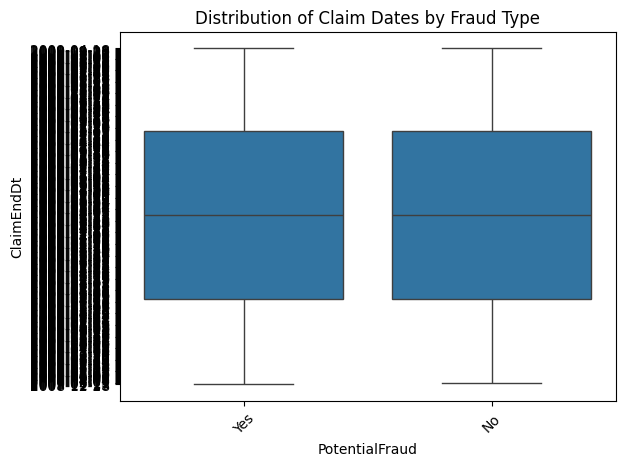

In [29]:
sns.boxplot(x="PotentialFraud", y="ClaimEndDt", data=full_data)
plt.xticks(rotation=45)
plt.title("Distribution of Claim Dates by Fraud Type")
plt.show()

In [33]:
ipop_grouped = claims.groupby("ClaimID").agg({
        "InscClaimAmtReimbursed": "sum",
        "DeductibleAmtPaid": "sum",
        "Provider": "first",
        "BeneID": "first",
    }).reset_index()

# ipop_grouped.head()

    # Merge with claims
merged = train_main.merge(ipop_grouped, on="Provider", how="left")
merged.head()


,Provider,PotentialFraud,ClaimID,InscClaimAmtReimbursed,DeductibleAmtPaid,BeneID
0,PRV51001,No,CLM119495,10,0.0,BENE86784
1,PRV51001,No,CLM168357,1000,0.0,BENE130029
2,PRV51001,No,CLM172987,100,0.0,BENE123416
3,PRV51001,No,CLM180133,1000,0.0,BENE79474
4,PRV51001,No,CLM260292,60,0.0,BENE61975


NameError: name '__file__' is not defined